<a href="https://colab.research.google.com/github/lfarlima/Project-2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports and Dependencies 

In [ ]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 12.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=98ae46499a4a77664d2b2938cd0b82cc471ec644f547dc0c3a89ebe725969fde
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
!pip install ibm_watson

     |████████████████████████████████| 389kB 8.2MB/s 
     |████████████████████████████████| 204kB 14.2MB/s 
  Created wheel for ibm-watson: filename=ibm_watson-5.1.0-cp37-none-any.whl size=375439 sha256=218509c8cbf4fad51e9b4b57b96c686714954aa30552d8ca01e9490bfa433b18
  Stored in directory: /root/.cache/pip/wheels/49/6d/cf/1d91261b96363da78bf9b02699fd2262e6b5dad179500690c1
  Created wheel for ibm-cloud-sdk-core: filename=ibm_cloud_sdk_core-3.9.0-cp37-none-any.whl size=59612 sha256=38e04d735a3cf508bcf08efe19acc6a4628465eb46b66b3548abe02bf6f967fc
  Stored in directory: /root/.cache/pip/wheels/a2/23/f2/ae9db79b4234ed0fc74bf00bc97bcd16440ab2764c5f443167
Successfully built ibm-watson ibm-cloud-sdk-core


In [ ]:
#imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer

import yfinance as yf # Stock data
from numpy.random import seed
seed (1)
from tensorflow import random
random.set_seed(2)

from nltk.corpus import stopwords, reuters
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import json
from pandas import json_normalize

# Code to download corpora
import nltk
nltk.download('wordnet')
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')


lemmatizer = WordNetLemmatizer()

api_key = "0ef1c61926f54984abcca4338225fd66"

# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Get the Tone Analyzer API Key and URL
tone_api = "zFumggLvdanjWjbKKqYfOetZc3Nu1PAaVJHVmc5FRt8t"

tone_url = "https://api.us-south.tone-analyzer.watson.cloud.ibm.com/instances/300fde5a-3dd1-4864-8a3d-1b8b626f35a9"

# Initialize Tone Analyser Client
# Create authentication object
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
authenticator = IAMAuthenticator(tone_api)
from ibm_watson import ToneAnalyzerV3

# Create tone_analyzer instance
tone_analyzer = ToneAnalyzerV3(
    version="2017-09-21",
    authenticator=authenticator
)

# Set the service endpoint
tone_analyzer.set_service_url(tone_url)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Twitter Tweet's VADER sentiment analysis 

In [ ]:
## This section is for proof of work. Not meant to be run

# pip install nest_asyncio

# pip install --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

# import twint
# import nest_asyncio
# nest_asyncio.apply()
# c= twint.Config()
# c.Search= "$DOT" or "DOT.X"
# c.Since= "2020-09-29"
# c.Until = '2021-04-04'
# # c.Limit= 1000
# c.Lang= "en"
# c.Store_csv= True
# c.Output= "Search.csv"

# twint.run.Search(c)


# df = pd.read_csv('Search.csv', encoding="utf-8-sig")
# df= df[["id", "created_at", "tweet", "language"]]
# df=df.loc[df["language"]=="en"]
# df=df.rename(columns={"id": "ID", "created_at": "Date", "tweet": "Tweet"})
# df=df.drop(["language"], axis=1)
# #need to standardize time 
# # df=df.set_index("Date")
# df.shape

In [35]:
## NEED TO UPLOAD FILES INSTEAD
# import local csv to colab
# from google.colab import files
# uploaded = files.upload()


#Meant to be used for jupyter notebook 
pltr_twitter_df = pd.read_csv('/content/pltr_twitter_df.csv', parse_dates=True, infer_datetime_format=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
pltr_twitter_df=pltr_twitter_df.sort_values(‘Date’)
pltr_twitter_df[‘Date’] = pd.to_datetime(pltr_twitter_df[‘Date’]).dt.date
pltr_twitter_df.head()

,Date,ID,Tweet
304526,2020-09-29 00:10:04 UTC,1310733546969952256,Don’t forget buy $PLTR tomorrow. Don’t sleep
304525,2020-09-29 00:48:23 UTC,1310743188496429058,Why? Why do they have to keep giving us new in...
304524,2020-09-29 00:53:35 UTC,1310744498633351168,Got $PLTR on my radar tomorrow. It's a growing...
304523,2020-09-29 01:16:41 UTC,1310750312328699905,The data-mining-software company Palantir Tech...
304522,2020-09-29 01:32:08 UTC,1310754200381423618,What you need to know about about Palantir lis...


In [ ]:
# Function to calculate sentiment based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1
    return result

In [ ]:
pltr_twtr_sentiments = []

for index, row in pltr_twitter_df.iterrows():
    try:
        text = row["Tweet"]
        date = row["Date"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        pol=  get_sentiment(compound)
        
        pltr_twtr_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "Polarity Score":pol
            
        })
        
    except AttributeError:
        pass



In [ ]:
pltr_twitter_sentiment_df = pd.DataFrame(pltr_twtr_sentiments)

pltr_twitter_sentiment_df=pltr_twitter_sentiment_df.sort_values('date')
pltr_twitter_sentiment_df=pltr_twitter_sentiment_df.set_index('date')
pltr_twitter_sentiment_df.head()

,Polarity Score,compound,negative,neutral,positive,text
date,,,,,,
2020-09-29 00:10:04 UTC,-1,-0.2263,0.241,0.759,0.000,Don’t forget buy $PLTR tomorrow. Don’t sleep
2020-09-29 00:48:23 UTC,1,0.6747,0.000,0.873,0.127,Why? Why do they have to keep giving us new in...
2020-09-29 00:53:35 UTC,1,0.5848,0.000,0.895,0.105,Got $PLTR on my radar tomorrow. It's a growing...
2020-09-29 01:16:41 UTC,0,0.0000,0.053,0.894,0.053,The data-mining-software company Palantir Tech...
2020-09-29 01:32:08 UTC,0,0.0000,0.000,1.000,0.000,What you need to know about about Palantir lis...


In [ ]:
# import pltr_twitter_sentiment_df csv to colab

pltr_twitter_sentiment_df = pd.read_csv('pltr_twitter_sentiment_df.csv')
pltr_twitter_sentiment_df.head(5)


,date,text,compound,positive,negative,neutral,Polarity Score
0,2020-09-29 00:10:04 UTC,Don’t forget buy $PLTR tomorrow. Don’t sleep,-0.2263,0.000,0.241,0.759,-1
1,2020-09-29 00:48:23 UTC,Why? Why do they have to keep giving us new in...,0.6747,0.127,0.000,0.873,1
2,2020-09-29 00:53:35 UTC,Got $PLTR on my radar tomorrow. It's a growing...,0.5848,0.105,0.000,0.895,1
3,2020-09-29 01:16:41 UTC,The data-mining-software company Palantir Tech...,0.0000,0.053,0.053,0.894,0
4,2020-09-29 01:32:08 UTC,What you need to know about about Palantir lis...,0.0000,0.000,0.000,1.000,0


In [ ]:
### CALCULATE AVERAGE BY DATE

In [ ]:
# Graph tallied Polarity Score 
pltr_twitter_sentiment_df.groupby('Polarity Score').size().plot(kind='bar')

<AxesSubplot:xlabel='Polarity Score'>

## Pull data from Newsapi and run VADER analysis

In [ ]:
# ## THIS IS FOR PROOF OF WORK. DOES NOT RUN ON COLAB

# pltr_headlines = newsapi.get_everything(
#     q="PLTR",
#     language="en",
#     page_size=10,
#     sort_by="relevancy",
#     from_param="2021-02-29"
# )

# pltr_headlines

In [ ]:
 # Transform the response dictionary to a DataFrame
pltr_newsapi_df = pd.DataFrame.from_dict(pltr_headlines["articles"])
pltr_newsapi_df.head()

,author,content,description,publishedAt,source,title,url,urlToImage
0,Emily Graffeo,Shares of Palantir gained 3.47% early Monday a...,Summary List PlacementShares of Palantir gaine...,2021-04-05T13:16:57Z,"{'id': 'business-insider', 'name': 'Business I...",Palantir jumps after securing 5-year contract ...,https://www.businessinsider.com/palantir-stock...,https://i.insider.com/605213680347cb00184b63a3...
1,Associated Press,Palantir Technologies has secured an $89.9 mil...,Israel carried out a missile attack near the S...,2021-04-07T22:42:22Z,"{'id': None, 'name': 'Yahoo Entertainment'}",Syria: Israeli strikes near capital Damascus w...,https://news.yahoo.com/syria-israel-fired-miss...,https://s.yimg.com/cv/apiv2/social/images/yaho...
2,Mike Murphy,Billionaire venture capitalist Peter Thiel is ...,Billionaire venture capitalist Peter Thiel is ...,2021-04-07T23:22:00Z,"{'id': None, 'name': 'MarketWatch'}",Key Words: China may be using bitcoin as ‘fina...,https://www.marketwatch.com/story/china-may-be...,https://images.mktw.net/im-322102/social
3,Shanthi Rexaline,Lets talk volatility. The NASDAQ kicked off th...,Palantir Technologies Inc. (NASDAQ: PLTR) shar...,2021-03-11T14:10:32Z,"{'id': None, 'name': 'Yahoo Entertainment'}",Palantir Strikes Long-Term Partnership With Fr...,https://finance.yahoo.com/news/palantir-strike...,https://s.yimg.com/uu/api/res/1.2/_NHYYjPEJy0H...
4,Steven Fiorillo,Photo by Sundry Photography/iStock Editorial v...,Palantir continues to expand its partnership w...,2021-04-09T13:00:00Z,"{'id': None, 'name': 'Seeking Alpha'}","Palantir: Ark Is Buying, I Am Buying, New Cont...",https://seekingalpha.com/article/4418273-palan...,https://static.seekingalpha.com/cdn/s3/uploads...


In [ ]:
pltr_sentiments = []

for article in pltr_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        pol=  get_sentiment(compound)
        
        pltr_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "Polarity Score":pol
            
        })
        
    except AttributeError:
        pass

In [ ]:
# Create DataFrame
pltr_newsapi_sentiment_df = pd.DataFrame(pltr_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral",'Polarity Score']
pltr_newsapi_sentiment_df = pltr_newsapi_sentiment_df[cols]
pltr_newsapi_sentiment_df.sort_values('date')
pltr_newsapi_sentiment_df.set_index('date')
pltr_newsapi_sentiment_df.head()

,date,text,compound,positive,negative,neutral,Polarity Score
0,2021-04-05,Shares of Palantir gained 3.47% early Monday a...,0.8176,0.275,0.000,0.725,1
1,2021-04-07,Palantir Technologies has secured an $89.9 mil...,0.7430,0.207,0.000,0.793,1
2,2021-04-07,Billionaire venture capitalist Peter Thiel is ...,-0.5267,0.000,0.132,0.868,-1
3,2021-03-11,Lets talk volatility. The NASDAQ kicked off th...,0.0000,0.000,0.000,1.000,0
4,2021-04-09,Photo by Sundry Photography/iStock Editorial v...,0.2960,0.064,0.000,0.936,1


In [ ]:
### CALCULATE AVERAGE BY DATE

In [ ]:
# Graph tallied Polarity Score 
pltr_newsapi_sentiment_df.groupby('Polarity Score').size().plot(kind='bar')

<AxesSubplot:xlabel='Polarity Score'>

In [ ]:
## Add another combined df here 

# combined_sent_df = pd.read_csv('/content/pltr_twitter_df.csv')

## VADER Sentiments WordCloud 

In [ ]:
df = pltr_twitter_sentiment_df["Polarity Score"]  ## WHAT IS THIS LINE FOR???
#pltr_twitter_sentiment_df[pltr_twitter_sentiment_df["Polarity Score"]=='-1']
words = ' '.join(pltr_twitter_sentiment_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
stopwords = set(STOPWORDS)
stopwords.add("PLTR")
stopwords.add("Palantir")

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

In [ ]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
### NEWSAPI WORDCLOUD

In [ ]:
# Do we use cumulative return of compound or polarity????
# c_return= (1 + pltr_twitter_sentiment_df['compound']).cumprod()
# c_return.head()

# pltr_twitter_sentiment_df.plot(kind='line', x='date', y='compound')

## VADER COMBINED DATAFRAME

In [ ]:
## WE NEED TO DOUBLE CHECK THIS
pltr_sent_df= pd.concat([pltr_twitter_sentiment_df, pltr_newsapi_sentiment_df], axis='columns' join="inner", ignore_index=True)

SyntaxError: ignored

## IBM WATSON TONE ANALYSIS - TWITTER AND NEWSAPI

In [ ]:
# CALCULATE DAILY POLARITY SCORES
# COMBINE INTO PLTR_TONE_DF
## pltr_combined_tone_df= pd.concat([pltr_twitter_tone_df, pltr_newsapi_tone_df], join="0", ignore_index=True)




In [ ]:
# Define text to analyze
text = df["text"]

# Analyze the text's tone with the 'tone()' method.
tone_analysis = tone_analyzer.tone(
    {"text": text},
    content_type="application/json",
    content_language="en",
    accept_language="en",
).get_result()

# Display tone analysis results
print(json.dumps(tone_analysis, indent=2)) 

In [ ]:
# Document Tones
doc_tone_df = json_normalize(data=tone_analysis["document_tone"], record_path=["tones"])
doc_tone_df

In [ ]:
 # Sentences Tones
sentences_tone_df = json_normalize(
    data=tone_analysis["sentences_tone"],
    record_path=["tones"],
    meta=["sentence_id", "text"],
)
sentences_tone_df

## Yahoo Finance Stock API 

In [ ]:
# Load PLTR stock closing prices from YFinance
pltr_yf = yf.download('PLTR',
                       start='2020-01-01',
                       end='2021-05-31',
                       progress=False,
                       index_col ='Date',
                       infer_datetime_format= True,
                       parse_dates = True,
                       interval='1d'

)
pltr_yf_df = pd.DataFrame(pltr_yf)
pltr_yf_df.head()



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-30,10.00,11.41,9.11,9.50,9.50,338584400
2020-10-01,9.69,10.10,9.23,9.46,9.46,124297600
2020-10-02,9.06,9.28,8.94,9.20,9.20,55018300
2020-10-05,9.43,9.49,8.92,9.03,9.03,36316900
2020-10-06,9.04,10.18,8.90,9.90,9.90,90864000


## WHICH MODEL PRODUCES BETTER RESULTS? VADER v WATSON


##Graph Sentiment score and Stock Price

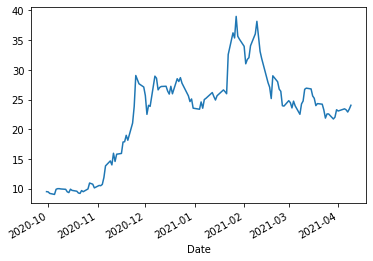

In [ ]:
pltr_yf_df["Close"].plot() 

In [ ]:
## COMBINE CLOSING PRICES WITH DAILY POLARITY SCORES (VADER)

# pltr_combined_df = Close + Polarity Scores (Index = Date)


## CHECK CORRELATIONS OF COMPOUND / POS / NEG / NEUTRAL / POLARITY SCORES (VADER)

##Graph Tone analysis score and Stock Price

In [ ]:
## COMBINE CLOSING PRICES WITH DAILY POLARITY SCORES (WATSON)

# pltr_combined_df = Close + Polarity Scores (Index = Date)


## CHECK CORRELATIONS OF COMPOUND / POS / NEG / NEUTRAL / POLARITY SCORES (WATSON)

## ML and LSTM Model 

In [ ]:
# Data Preprocessing for Twitter df 

# Creating the X and y vectors
X = pltr_combined_df["Close"].values # VADER v WATSON - which model do we use here?
y = pltr_combined_df["Polarity Score"].values

In [ ]:
 # Import Keras modules for data encoding
# from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
 # Padding sequences
X_pad = pad_sequences(X_seq, maxlen=140, padding="post")

In [ ]:
 # Creating training, validation, and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pad, y, random_state=0)


In [ ]:
 # Import Keras modules for model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [ ]:
# Model set-up
vocabulary_size = len(tokenizer.word_counts.keys()) + 1
max_words = 140
embedding_size = 64 

In [ ]:
 # Define the LSTM RNN model
model = Sequential()

# Layer 1
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))

# Layer 2
model.add(LSTM(units=280))

# Output layer
model.add(Dense(1, activation="sigmoid"))

In [ ]:
# Compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer="adam"
)

In [ ]:
 # Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 140, 64)           7667008   
_________________________________________________________________
lstm (LSTM)                  (None, 280)               386400    
_________________________________________________________________
dense (Dense)                (None, 1)                 281       
Total params: 8,053,689
Trainable params: 8,053,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the model
batch_size = 1000
model.fit(
    X_train,
    y_train,
    epochs=3, ## REDUCED EPOCHS FOR TESTING PURPOSES ONLY
    batch_size=batch_size,
    verbose=1,
)

Epoch 1/10
332/332 [==============================] - 976s 3s/step - loss: 0.6574
Epoch 2/10
332/332 [==============================] - 952s 3s/step - loss: 0.6513
Epoch 3/10
332/332 [==============================] - 957s 3s/step - loss: 0.6500
Epoch 4/10
332/332 [==============================] - 1348s 4s/step - loss: 0.6506
Epoch 5/10
 59/332 [====>.........................] - ETA: 13:30 - loss: 0.6479

KeyboardInterrupt: 

In [ ]:
 # Predict classes using the testing data. (bath_size the smaller the better)
y_rnn_pred = model.predict_classes(X_test_rnn, batch_size=1000)

## Accuracy and Model Comparison

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score

print("RNN LSTM Accuracy %.2f" % (accuracy_score(y_test_rnn, y_rnn_pred)))

In [ ]:
#  Confusion Matrix

 from sklearn.metrics import confusion_matrix

 # Confusion matrtix metrics from the RNN LSTM model
tn_rnn, fp_rnn, fn_rnn, tp_rnn = confusion_matrix(y_test_rnn, y_rnn_pred).ravel()

# Dataframe to display confusion matrix from the RNN LSTM model
cm_rnn_df = pd.DataFrame(
    {
        "Positive(1)": [f"TP={tp_rnn}", f"FP={fp_rnn}"],
        "Negative(0)": [f"FN={fn_rnn}", f"TN={tn_rnn}"],
    },
    index=["Positive(1)", "Negative(0)"],
)
cm_rnn_df.index.name = "Actual"
cm_rnn_df.columns.name = "Predicted"
print("Confusion Matrix from the RNN LSTM Model")
display(cm_rnn_df)

## Classification Report 

In [ ]:
# Import the classification_report method from sklearn
from sklearn.metrics import classification_report

# Display classification report for the RNN LSTM Model
print("Classification Report for the RNN LSTM Model")
print(classification_report(y_rnn_pred, y_test_rnn))

## Plotting the ROC Curve

In [ ]:
 # Import the roc_curve and auc metrics from sklearn
from sklearn.metrics import roc_curve, auc

 # Making predictions to feed the roc_curve module
test_predictions_rnn = model.predict(X_test_rnn, batch_size=1000)

In [ ]:
 # Data for ROC Curve - RNN LSTM Model
fpr_test_rnn, tpr_test_rnn, thresholds_test_rnn = roc_curve(y_test_rnn, test_predictions_rnn)

In [ ]:
# AUC for the RNN LSTM Model
auc_test_rnn = auc(fpr_test_rnn, tpr_test_rnn)
auc_test_rnn = round(auc_test_rnn, 4)

In [ ]:
roc_df_test_rnn = pd.DataFrame({"FPR Test": fpr_test_rnn, "TPR Test": tpr_test_rnn,})

In [ ]:
roc_df_test_rnn.plot(
    x="FPR Test",
    y="TPR Test",
    color="blue",
    style="--",
    xlim=([-0.05, 1.05]),
    title=f"Test ROC Curve (AUC={auc_test_rnn})",
)

##  Making Predictions

In [ ]:
# Make some predictions
predicted = model.predict(X_test)

 # Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
    }, index = df.index[-len(real_prices): ])
stocks.head()

In [ ]:
# Plot the real vs predicted prices as a line chart
stocks.plot()